[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


--- First 5 Rows of Data ---
                                        review_text sentiment
0  I absolutely love this product, it is fantastic!  Positive
1     Terrible experience, the item arrived broken.  Negative
2         It's okay, not the best but does the job.   Neutral
3           Worst customer service ever, very rude.  Negative
4        Great value for money, highly recommended.  Positive

--- Data After Preprocessing ---
                                        review_text  \
0  I absolutely love this product, it is fantastic!   
1     Terrible experience, the item arrived broken.   
2         It's okay, not the best but does the job.   
3           Worst customer service ever, very rude.   
4        Great value for money, highly recommended.   

                              cleaned_text  
0        absolutely love product fantastic  
1  terrible experience item arrived broken  
2                            okay best job  
3         worst customer service ever rude  
4     gre

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


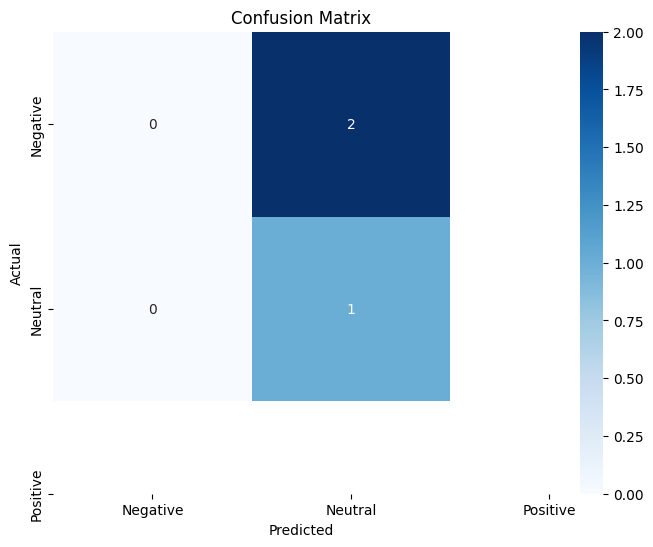


--- Test with Custom Input ---
Review: 'This product is amazing and works perfectly' -> Sentiment: Positive


In [1]:
# ==========================================
# CODTECH IT SOLUTIONS INTERNSHIP
# TASK 2: SENTIMENT ANALYSIS WITH NLP
# ==========================================

# 1. Import Essential Libraries
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Download NLTK data (if not already present)
nltk.download('stopwords')
from nltk.corpus import stopwords

# 2. Load the Dataset
# NOTE: Replace the sample data creation below with: df = pd.read_csv('your_dataset.csv')
# For demonstration, we will create a small synthetic dataset of customer reviews.
data = {
    'review_text': [
        "I absolutely love this product, it is fantastic!",
        "Terrible experience, the item arrived broken.",
        "It's okay, not the best but does the job.",
        "Worst customer service ever, very rude.",
        "Great value for money, highly recommended.",
        "I am very happy with my purchase.",
        "Disappointed, the quality is poor.",
        "Average product, nothing special.",
        "Superb quality and fast delivery!",
        "Not worth the price, do not buy.",
        "Excellent service and support.",
        "The product stopped working after one day.",
        "Decent quality for the price.",
        "I hate this, it is a waste of money.",
        "Five stars! Will buy again."
    ],
    'sentiment': [
        'Positive', 'Negative', 'Neutral', 'Negative', 'Positive',
        'Positive', 'Negative', 'Neutral', 'Positive', 'Negative',
        'Positive', 'Negative', 'Neutral', 'Negative', 'Positive'
    ]
}

df = pd.DataFrame(data)

# Display first few rows
print("--- First 5 Rows of Data ---")
print(df.head())

# 3. Data Preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Apply preprocessing
df['cleaned_text'] = df['review_text'].apply(preprocess_text)

print("\n--- Data After Preprocessing ---")
print(df[['review_text', 'cleaned_text']].head())

# 4. Feature Extraction (TF-IDF Vectorization)
# We use TF-IDF as explicitly requested in the Task 2 instructions
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_text']).toarray()
y = df['sentiment']

# 5. Model Training (Logistic Regression)
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# 6. Evaluation
y_pred = model.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")

# Classification Report
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 7. Test with Custom Input
print("\n--- Test with Custom Input ---")
new_review = "This product is amazing and works perfectly"
cleaned_review = preprocess_text(new_review)
new_vector = tfidf.transform([cleaned_review]).toarray()
prediction = model.predict(new_vector)
print(f"Review: '{new_review}' -> Sentiment: {prediction[0]}")